In [1]:
import os
import cv2
import numpy
from matplotlib import pyplot as plt
import math

In [3]:
def get_average_brightness(img, left_bound, right_bound, bottom_bound, top_bound):
  if right_bound < left_bound or top_bound < bottom_bound:
    raise Exception('Wrong bounds!')
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cropped_gray_image = gray_image[bottom_bound:top_bound, left_bound:right_bound]
  h, w = cropped_gray_image.shape
  denominator = h * w
  nominator = 0
  for i in range(h):
    for k in range(w):
      nominator += cropped_gray_image[i, k]
  return nominator / denominator

Задаем границы работы в изображении проходим по каждому изображению из папки для каждого фото получаем значения + или - ev составляем массив значений и рисуем график

In [8]:
left_bound = 600
right_bound = 2500
bottom_bound = 300
top_bound = 1500
data_dir = 'task1/'
ev = []
startv = 2.0
cur_ev = 2.17
avg_brightness = []
for filename in os.listdir(data_dir):
  print(f'read {filename}')

  cur_ev = startv - (0.17 * ((int)(filename.split('.')[0]) - 1))
  ev.append(cur_ev)
  image = cv2.imread(data_dir + filename)
  avg_brightness.append(math.log(get_average_brightness(image, left_bound, right_bound, bottom_bound, top_bound)))

[ev, avg_brightness]

read 1.jpg
read 10.jpg
read 11.jpg
read 12.jpg
read 13.jpg
read 14.jpg
read 15.jpg
read 16.jpg
read 17.jpg
read 18.jpg
read 19.jpg
read 2.jpg
read 20.jpg
read 3.jpg
read 4.jpg
read 5.jpg
read 6.jpg
read 7.jpg
read 8.jpg
read 9.jpg


[[2.0,
  0.47,
  0.2999999999999998,
  0.1299999999999999,
  -0.040000000000000036,
  -0.20999999999999996,
  -0.38000000000000034,
  -0.5500000000000003,
  -0.7200000000000002,
  -0.8900000000000001,
  -1.06,
  1.83,
  -1.2300000000000004,
  1.66,
  1.49,
  1.3199999999999998,
  1.15,
  0.98,
  0.8099999999999998,
  0.6399999999999999],
 [3.2910829167828823,
  2.498926422261368,
  2.4215444355068874,
  2.3400276663855784,
  2.2364691507408323,
  2.1546682504027883,
  2.085793358364244,
  1.9800687455599997,
  1.8653334348919297,
  1.7040440564013632,
  1.6625911781297518,
  3.2243635201586525,
  1.5016039076050793,
  3.1693942942452145,
  3.1244847369953344,
  3.0564093904077128,
  2.9822141459531992,
  2.897807457038478,
  2.7446438816114624,
  2.60869614978368]]

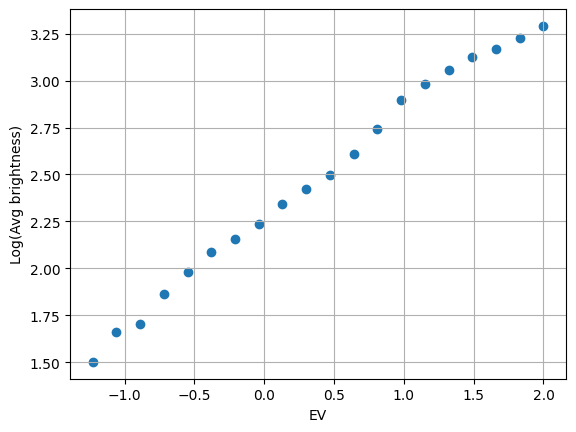

In [9]:
plt.scatter(ev,avg_brightness)
plt.xlabel('EV')
plt.ylabel('Log(Avg brightness)')
plt.grid()